# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** *B*

**Names:**

* *Keijiro Tajima*
* *Mahammad Shirinov*
* *Stephen Zhao*

---

#### Instructions

*This is a template for part 2 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

---

## 2.2 Network sampling

#### Exercise 2.7: Random walk on the Facebook network

In [1]:
import requests
import random
# Base url of the API
URL_TEMPLATE = 'http://iccluster040.iccluster.epfl.ch:5050/v1.0/facebook?user={user_id}'
node_0 = "f30ff3966f16ed62f5165a229a19b319"

def sample_age (s, N):
    age_sum = 0
    age_sum_weighted = 0
    sum_of_weights = 0
    current_node_id = s
    for i in range(N):
        # The actual url to call 
        url = URL_TEMPLATE.format(user_id=current_node_id)
        # Execute the HTTP Get request
        response = requests.get(url)
        # Format the json response as a Python dict
        data = response.json()
        age_sum += data['age']
        
        # For Exercise 2.8: weight the age by the inverse of degree of the node
        age_sum_weighted += data['age']/len(data['friends'])
        sum_of_weights += 1/len(data['friends'])
        
        # next jump
        current_node_id = random.choice(data['friends'])
        
    avg = age_sum/N
    avg_weighted = age_sum_weighted/sum_of_weights
    
    return avg, avg_weighted

###### Random Walker on Facebook

We visited 2000 nodes for the following estimation, which gives results mostly in the range [21, 24].

In [2]:
number_of_users = 2000
print("Average age over {} users:".format(number_of_users), sample_age(node_0, number_of_users)[0])

Average age over 2000 users: 23.2355


#### Exercise 2.8

The above estimation was a far cry from the real average age of Facebook users. In particular, the average estimate is between 21 and 24; this partly stems from a bias of the random walk in this particular graph toward younger users. Since younger people have more friends compared to old people, and those friends are also young on average, a random walk tends to spend most of its time on nodes corresponding to young users.
To diminish this effect and get a better estimate, we try to control how much a person's age contributes to the average. We do this by weighing a node's age by the inverse of its degree. This might look as if 'unpopular people matter more in the average', but in reality, since we're not taking the real average across all the nodes and only sampling it using a random walk, this evens out the random walk's amplification of popular nodes' age values.

*Note that the code to compute the weighted average was included in the sample_age function definition above*

In [3]:
number_of_users = 2000
print("Average age over {} users:".format(number_of_users), sample_age(node_0, number_of_users)[1])

Average age over 2000 users: 43.8934139594184


Indeed, we do get more realistic results now. Next, we plot the results over time.

In [4]:
import matplotlib.pyplot as plt
import math

In [5]:
# Compute averages over samples of size [3^1..3^8]
n = 1
sample_age_sample = {}
sample_age_sample_weighted = {}
for i in range(8):
    n *= 3
    sample_age_sample[n], sample_age_sample_weighted[n] = sample_age(node_0, n)

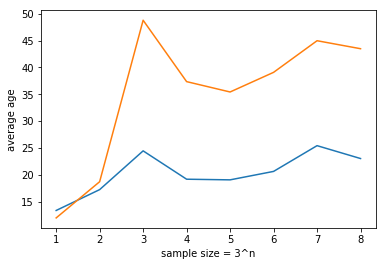

In [6]:
x = [1, 2, 3, 4, 5, 6, 7, 8]
plt.plot(x, sample_age_sample.values())
plt.plot(x, sample_age_sample_weighted.values())
plt.xlabel('sample size = 3^n')
plt.ylabel('average age')
plt.show()